> lambda, map, 판다스--인덱싱(1)

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-wxe8lWPtjKVy-D10Ul4E_7>

# imports

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# lambda, map ($\star$)

## lambda 

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임 

In [191]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

<function __main__.<lambda>(x)>

- "lambda x: (x-2)**2" 는 $lambda(x)=(x-2)^2$의 느낌으로 기억하면 쉬움 

**(사용방법)**

In [192]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

0

In [193]:
(lambda x: (x-2)**2)(4) # 입력5 -> 출력 (4-2)^2 =4 

4

In [194]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

16

In [195]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

16

`-` 예제2: 람다표현식에 이름을 줄 수 있음. 

In [196]:
f = lambda x: (x-2)**2

In [197]:
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

위의 코드는 아래와 같다. 

In [198]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

`-` 예제3: 조건부 출력

In [199]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [200]:
f(1,20)

20

`-` 예제4: 람다표현식들의 리스트 

In [201]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [202]:
for f in fl: 
    print(f(2))

2
4
8


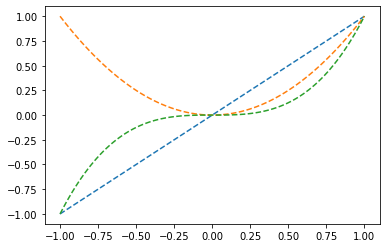

In [203]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리 

In [204]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

{'f1': <function __main__.<lambda>(x)>,
 'f2': <function __main__.<lambda>(x)>,
 'f3': <function __main__.<lambda>(x)>}

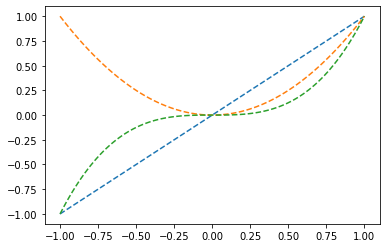

In [205]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수) 

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을 계산해보기 

In [206]:
g = lambda x: x**2 

In [207]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [208]:
gg(4)

8.0010000000037

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의 함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다. 

In [209]:
def derivate(g):
    return lambda x: (g(x+0.001)-g(x))/0.001 

(사용1)

In [210]:
g = lambda x: np.sin(x) 

In [211]:
gg = derivate(g) 

In [212]:
x = np.linspace(0,6.28,1000) 

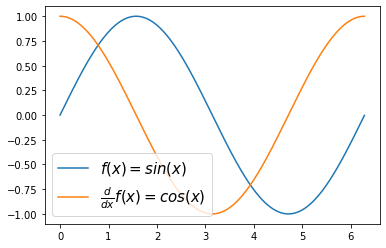

In [213]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [214]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

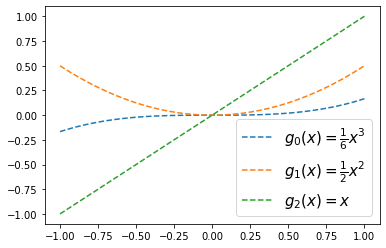

In [216]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현 

In [218]:
derivate = lambda g: lambda x: (g(x+0.001)-g(x))/0.001 

(사용1)

In [219]:
g = lambda x: np.sin(x) 

In [220]:
gg = derivate(g) 

In [221]:
x = np.linspace(0,6.28,1000) 

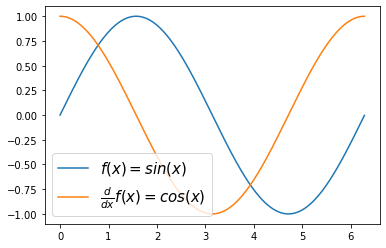

In [222]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [223]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

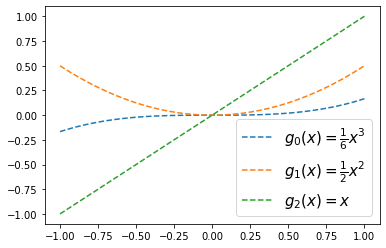

In [224]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

## map 

`-` 개념: $\text{map}\left(f,[x_1,x_2,\dots,x_n] \right)=\left[f(x_1),f(x_2),\dots,f(x_n) \right] $

`-` 예제1: 

In [135]:
x=[1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [136]:
list(map(lambda x: x+1,[1,2,3]))

[2, 3, 4]

(다른구현2)

In [139]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현3)

In [140]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현4)--최악

In [141]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [142]:
y

[2, 3, 4]

(다른구현5)--더 최악

In [143]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [144]:
y

[2, 3, 4]

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False 
```
입력: A,B,C,a,b,c
출력: T,T,T,F,F,F
```

In [161]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [162]:
x,y

(['A', 'B', 'C', 'a', 'b', 'c'], [True, True, True, False, False, False])

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트 컴프리헨션보다 조금 편한것 같다) 

In [268]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

[0, 0, 0]

(다른구현)-- 리스트컴프리헨션 

In [269]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

[0, 0, 0]

`-` 예제4: map은 "하나의 함수에 다양한 입력"을 적용하는 경우에만 사용가능, 리스트컴프리헨션은 "다양한 함수에 다양한 입력" 지원 

In [270]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패 

In [271]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

TypeError: 'list' object is not callable

리스트컴프리헨션으로 구현시도 $\to$ 성공 

In [272]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

[0, 0, 0]

`-` 종합: map과 리스트컴프리헨션과 비교

- map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은 필요함 
- map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음. 

# 판다스: 인덱싱 1단계-- 인덱싱의 4가지 컨셉

## 데이터프레임 준비

`-` 데이터준비

In [281]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70
...,...,...,...,...
195,55,70,40,95
196,65,85,25,85
197,85,85,100,10
198,80,65,35,60


`-` 앞으로는 위와 같은 df형태를 가정할 것이다. 즉 column의 이름은 문자열, row의 이름은 0부터 시작하는 정수로 가정한다.    

`-` 아래와 같은 형태는 일단 생각하지 않는다. 

In [286]:
pd.DataFrame({'att':[60,65,80,90],'rep':[50,100,90,100]},index=['규빈','영미','성준','혜미'])

,att,rep
규빈,60,50
영미,65,100
성준,80,90
혜미,90,100


## df의 4가지 컨셉

`-` 원소에 접근하는 4가지 방법: `.`, `[]`, `.iloc[]`, `.loc[]` 

## 컨셉1: 클래스느낌 

`-` 컨셉1: df는 인스턴스이다. 그리고 df.att, df.rep,df.mid, df.fin 와 같이 col이름에 대응하는 속성이 있다. 

In [290]:
df.head()

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70


In [294]:
df.fin

0      10
1      10
2      20
3       5
4      70
       ..
195    95
196    85
197    10
198    60
199    85
Name: fin, Length: 200, dtype: int64

`-` 언제유용? col의 이름을 대충 알고 있을 경우 자동완성으로 쉽게 선택가능 

## 컨셉2: 딕셔너리 + $\alpha$ 느낌 

`-` 컨셉2: df는 컬럼이름이 key, 컬럼의데이터가 value가 되는 dictionary로 이해할 수 있다. 즉 아래의 dct와 같은 딕셔너리로 이해할 수 있다. 

In [329]:
dct = dict(df) 
#dct

(예시) .keys() 메소드를 이용하여 컬럼들의 이름을 살펴볼 수 있음.

In [325]:
dct.keys(), df.keys()

(dict_keys(['att', 'rep', 'mid', 'fin']),
 Index(['att', 'rep', 'mid', 'fin'], dtype='object'))

### `#` col indexing 

`-` 예시1: dct가 가능하면 df도 가능하다. 

In [306]:
df['att']
#dct['att'] 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: dct가 가능하면 df도 가능하다. (2)

In [308]:
df.get('att')
#dct.get('att') 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시3: dct에서 불가능하지만 df에서 가능한것도 있다. 

In [310]:
dct.get(['att','rep'])

TypeError: unhashable type: 'list'

In [311]:
df.get(['att','rep'])

,att,rep
0,65,45
1,95,30
2,65,85
3,55,35
4,80,60
...,...,...
195,55,70
196,65,85
197,85,85
198,80,65


`-` 예시4: dct에서 불가능하지만 df에서 가능한것도 있다. (2)

In [314]:
dct[['att','rep']]

TypeError: unhashable type: 'list'

In [315]:
df[['att','rep']]

,att,rep
0,65,45
1,95,30
2,65,85
3,55,35
4,80,60
...,...,...
195,55,70
196,65,85
197,85,85
198,80,65


### `#` row indexing 

`-` 예시5: dct에서 불가능하지만 df에서 가능한것도 있다. (3)

In [316]:
dct[:5] 

TypeError: unhashable type: 'slice'

In [317]:
df[:5]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70


## 컨셉3: 넘파이느낌 

`-` 컨셉3: `df.iloc`은 넘파이에러이처럼 생각가능하다. 즉 아래의 arr와 같은 넘파이어레이로 생각가능하다. 

In [328]:
arr = np.array(df)
#arr

### `#` row indexing 

`-` 예시1: 단일레이블 

In [348]:
arr[0,:] # first row 
arr[0,] 
arr[0]

array([65, 45,  0, 10])

In [349]:
df.iloc[0,:] # first row 
df.iloc[0,] 
df.iloc[0]

att    65
rep    45
mid     0
fin    10
Name: 0, dtype: int64

`-` 예시2: 레이블의 리스트

In [350]:
arr[[0,1,2],:] # 처음 3개의 row 선택 
arr[[0,1,2],] 
arr[[0,1,2]]

array([[65, 45,  0, 10],
       [95, 30, 60, 10],
       [65, 85, 15, 20]])

In [351]:
df.iloc[[0,1,2],:] # 처음 3개의 row 선택 
df.iloc[[0,1,2],] 
df.iloc[[0,1,2]]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


`-` 예시3: 슬랑이싱 

In [352]:
arr[0:3,:] # 처음 3개의 row선택, 끝점포함X
arr[0:3,] 
arr[0:3]

array([[65, 45,  0, 10],
       [95, 30, 60, 10],
       [65, 85, 15, 20]])

In [353]:
df.iloc[0:3,:] # 처음 3개의 row선택, 끝점포함X
df.iloc[0:3,] 
df.iloc[0:3]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


### `#` col indexing 

`-` 예시1: 단일레이블 

In [362]:
df.iloc[:,0] # first column 
# arr[:,0] # first column 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: 레이블의 리스트

In [363]:
df.iloc[:,[0,2]] # col1, col3 을 선택
# arr[:,[0,2]] # col1, col3 을 선택

,att,mid
0,65,0
1,95,60
2,65,15
3,55,35
4,80,55
...,...,...
195,55,40
196,65,25
197,85,100
198,80,35


`-` 예시3: 슬랑이싱 

In [366]:
df.iloc[:,0:3] # 처음 3개의 col선택, 끝점포함X
#arr[:,0:3]

,att,rep,mid
0,65,45,0
1,95,30,60
2,65,85,15
3,55,35,35
4,80,60,55
...,...,...,...
195,55,70,40
196,65,85,25
197,85,85,100
198,80,65,35


### `#` row + col indexing

In [402]:
df.iloc[::2,0:3]

,att,rep,mid
0,65,45,0
2,65,85,15
4,80,60,55
6,65,70,60
8,95,55,65
...,...,...,...
190,95,35,40
192,100,40,80
194,65,40,65
196,65,85,25


## 컨셉4: 데이터프레임 느낌 

`-` 컨셉4: `df.loc`은 새로운 느낌.. (R에 익숙하면 `df.loc`이 dataframe 혹은 티블느낌이라고 보시면 됩니다) 

In [367]:
import rpy2
%load_ext rpy2.ipython 

In [392]:
%%R 
library(tidyverse) 
mpg[1:5,c('model','year')]

# A tibble: 5 × 2
  model  year
  <chr> <int>
1 a4     1999
2 a4     1999
3 a4     2008
4 a4     2008
5 a4     1999


### `#` row indexing

`-` 예시1: 단일레이블 

In [385]:
df.loc[0,:] # 첫번째 row를 선택 
df.loc[0,]
df.loc[0] 

att    65
rep    45
mid     0
fin    10
Name: 0, dtype: int64

`-` 예시2: 레이블의 리스트 

In [386]:
df.loc[[0,1,2],:] # 처음 3개의 row를 선택 
df.loc[[0,1,2],]
df.loc[[0,1,2]] 

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


`-` 예시3: 슬라이싱 (끝점포함 O)

In [387]:
df.loc[0:3,:] # 처음 4개의 row를 선택, 끝점포함 
df.loc[0:3,]
df.loc[0:3] 

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5


### `#` col indexing 

`-` 예시1: 단일레이블 

In [393]:
df.loc[:,'att'] 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: 레이블의 리스트

In [394]:
df.loc[:,['att','mid']] 

,att,mid
0,65,0
1,95,60
2,65,15
3,55,35
4,80,55
...,...,...
195,55,40
196,65,25
197,85,100
198,80,35


`-` 예시3: 슬라이싱 (끝점포함 O)

In [395]:
df.loc[:,'att':'mid'] # 끝점포함 

,att,rep,mid
0,65,45,0
1,95,30,60
2,65,85,15
3,55,35,35
4,80,60,55
...,...,...,...
195,55,70,40
196,65,85,25
197,85,85,100
198,80,65,35


### `#` row + col indexing 

In [404]:
df.loc[::-1,'att':'mid'] # 끝점포함 

,att,rep,mid
199,50,95,45
198,80,65,35
197,85,85,100
196,65,85,25
195,55,70,40
...,...,...,...
4,80,60,55
3,55,35,35
2,65,85,15
1,95,30,60


## 컨셉1~4 정리 

||`.`| `[]` | `.iloc` | `.loc`| 
|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O|
|col/단일레이블|O|O|O|O|
|row/레이블리스트|X|X|O|O|
|col/레이블리스트|X|O|O|O|
|row/슬라이싱|X|O|O|O|
|col/슬라이싱|X|X|O|O|

`-` col 이름을 알아야하는 부담감
- `.` : 앞글자만 대충 알아도 자동완성 가능 
- `[]`: 정확한 col 이름을 알아야 함
- `.loc`: 보통 정확한 col 이름을 알아야 하지만 슬라이싱 이용시 양 끝의 컬럼이름만 알면 무방 
- `.iloc`: 정확한 col 이름을 몰라도 번호로 인덱싱 가능

`-` 자주하는 실수 

In [431]:
df['att'] # 가능 
# df.loc['att'] # 불가능
df.loc[:,'att'] # 가능

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

# 판다스: 인덱싱 2단계-- 필터링(특정조건에 맞는 row를 선택) 

## att > 90 and rep < 50 

`-` 방법1: .query()를 이용

In [457]:
df.query('att>90 and rep<50') 

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [458]:
df.query('(att>90)&(rep<50)') 

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [462]:
df.query('att>90 & rep<50') 

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


`-` 방법2: [], `.iloc`, `.loc`

In [483]:
df[(df.att > 90)&(df.rep < 50)]
df.loc[(df.att > 90)&(df.rep < 50)]
df.iloc[list((df.att > 90)&(df.rep < 50))]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


`-` 방법3: [], `.iloc`, `.loc` // map, lambda 

In [499]:
df[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
# df[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)] # 이것은 불가능

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [497]:
df.iloc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.iloc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [496]:
df.loc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.loc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


## att > mean(att)

`-` 방법1: .query()를 이용

In [507]:
df.query('att> att.mean()') 

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


`-` 방법2: [], `.iloc`, `.loc`

In [506]:
df[df.att > df.att.mean()]
df.loc[df.att > df.att.mean()]
df.iloc[list(df.att > df.att.mean())]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


`-` 방법3: [], `.iloc`, `.loc` // map, lambda 

In [513]:
df[list(map(lambda x: x>df.att.mean() , df.att))]
# df[map(lambda x: x>df.att.mean() , df.att)] # 이것은 불가능

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


In [514]:
df.iloc[list(map(lambda x: x>df.att.mean() , df.att))]
df.iloc[map(lambda x: x>df.att.mean() , df.att)]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


In [515]:
df.loc[list(map(lambda x: x>df.att.mean() , df.att))]
df.loc[map(lambda x: x>df.att.mean() , df.att)]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


||`.`| `[]` | `.iloc` | `.loc`| 
|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O|
|col/단일레이블|O|O|O|O|
|row/레이블리스트|X|X|O|O|
|col/레이블리스트|X|O|O|O|
|row/슬라이싱|X|O|O|O|
|col/슬라이싱|X|X|O|O|
|row/bool,list|X|O|O|O|
|row/bool,ser|X|O|X|O|
|row/bool,map|X|X|O|O|

# 숙제

## `1`. 10월12일 숙제 

아래와 같이 0~9까지 포함된 리스트를 만들어라 

In [240]:
x=list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

아래와 동일한 기능을 수행하는 함수를 lambda expression으로 정의하라.

In [231]:
def f(xi):
    return '짝' if (xi % 2)==0 else '홀'

map과 lambda expression 을 이용하여 아래와 같은 결과를 만들어라. (리스트컴프리헨션, for문 사용금지) 

In [ ]:
# 
# 구현예시

['짝', '홀', '짝', '홀', '짝', '홀', '짝', '홀', '짝', '홀']

## `2`. 10월14일 숙제 

다음과 같은 데이터프레임을 불러온 뒤 물음에 답하라 

In [518]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70
...,...,...,...,...
195,55,70,40,95
196,65,85,25,85
197,85,85,100,10
198,80,65,35,60


`(1)` 기말고사 성적이 중간고사 성적보다 향상된 학생들을 출력하라. 즉 mid < fin 인 학생들을 출력하라. (다양한 방법으로 연습할 것, 제출은 한 가지 방법으로 구현해도 감점없음) 

In [521]:
# 구현결과가 아래와 같아야 한다. 

,att,rep,mid,fin
0,65,45,0,10
2,65,85,15,20
4,80,60,55,70
5,75,40,75,85
6,65,70,60,75
...,...,...,...,...
194,65,40,65,70
195,55,70,40,95
196,65,85,25,85
198,80,65,35,60


`(2)` 기말고사 성적이 중간고사 성적보다 향상된 학생들의 출석과 레포트 점수를 출력하라. 

In [523]:
# 구현결과가 아래와 같아야 한다. 

,att,rep
0,65,45
2,65,85
4,80,60
5,75,40
6,65,70
...,...,...
194,65,40
195,55,70
196,65,85
198,80,65
